# Exercice 3 : schémas implicites

On considère le problème suivant :
$$
\left\{
\begin{array}{rl}
x'(t)&=x(t)+2y(t)\\
y'(t)&=2x(t)+y(t)
\end{array}
\right.
$$
sur l'intervalle $[0,1]$ avec la condition initiale $x(0)=5$ et $y(0)=0$.
On rappelle que les solutions de cette EDO est 
$$
  x(t) = \frac52 (e^{-t} + e^{3t}), \quad y(t) = \frac52 (-e^{-t} + e^{3t}).
$$

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import numpy.linalg as LA

# fonction second membre f
def f(X,t):
    x = X[0] + 2*X[1]
    y = 2*X[0] + X[1]
    return np.array([x,y])
# gradient de f par rapport a l'espace
def df(X,t):
    return np.array([[1,2],[2,1]])

# solution exacte :
def sol(X0,t):
    a = (X0[0]-X0[1])/2.
    b = (X0[0]+X0[1])/2.
    x = a * np.exp(-t) + b * np.exp(3*t)
    y = - a * np.exp(-t) + b * np.exp(3*t)
    return np.array([x,y])

**Q1)** Coder un programme `Newton(F,dF,X0,tol,maxiter)` qui renvoie la solution $X \in \mathbb{R}^2$ de l'équation $F(X) = 0$ calculée par la méthode de Newton (`dF` est la jacobienne de `F`).

In [3]:
## methode de Newton
def Newton(f,df,x0,tol,maxiter):
    x = x0
    it = 0
    delta_norm = LA.norm(f(x)) 
    while delta_norm > tol and it < maxiter :
        delta_x = np.dot( LA.inv( df(x) ) , f(x) )
        x = x - delta_x
        it += 1
        delta_norm = LA.norm(f(x))
    return x


**Q2)** En utilisant la question précédente, coder le schéma d'Euler implicite donné par $X_{n+1} = X_n + h f(t_{n+1} , X_{n+1})$.

In [4]:
## schema d'Euler implicite
## df : jacobienne de f par rapport a l'espace
def Euler_imp(f,df,X0,N,T):
    dt = T/N # pas de temps
    t=0 # temps
    X = np.zeros([N+1,2])
    X[0] = X0
    ## boucle en temps
    for i in range(0,N):
        def F(z):
            return z - X[i] - dt * f(z,t+dt)
        def DF(z):
            return np.identity(2) - dt * df(z,t+dt)
        X[i+1] = Newton(F,DF,X[i],1e-6,10)
        t += dt
    return X

**Q3)** Coder le schéma de Crank-Nicolson donné par $X_{n+1} = X_n + \frac{h}2 (f(t_{n+1} , X_{n+1}) + f(t_{n} , X_{n}))$.


In [5]:
## schema de Crank-Nicolson
## df : jacobienne de f par rapport a l'espace
def Crank_Nicolson(f,df,X0,N,T):
    dt = T/N # pas de temps
    t=0 # temps
    X = np.zeros([N+1,2])
    X[0] = X0
    ## boucle en temps
    for i in range(0,N):
        def F(z):
            return z - X[i] - 0.5 * dt * (f(X[i],t) + f(z,t+dt))
        def DF(z):
            return np.identity(2) - 0.5 * dt * df(z,t+dt)
        X[i+1] = Newton(F,DF,X[i],0.000001,10)
        t += dt
    return X


**Q4)** Tracer les solutions approchées données par les deux schémas et comparer avec la solution exacte.

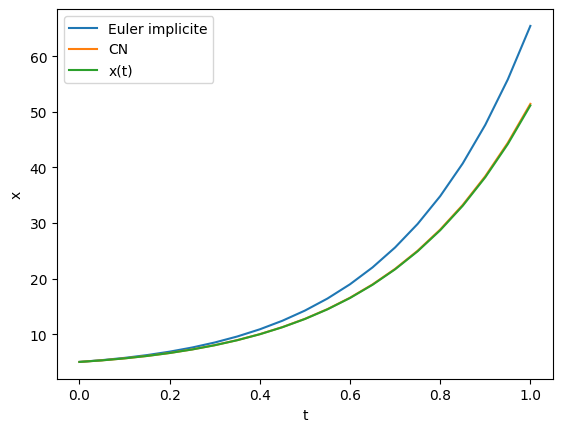

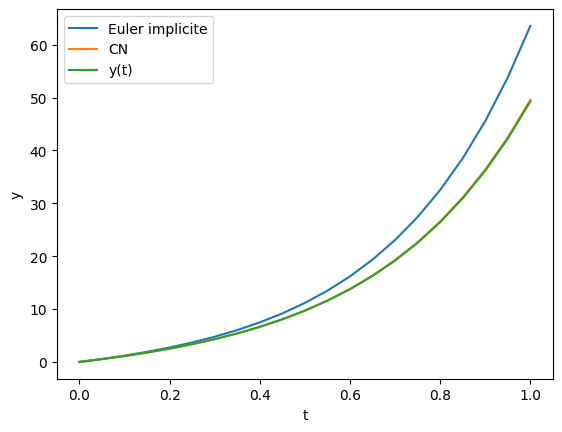

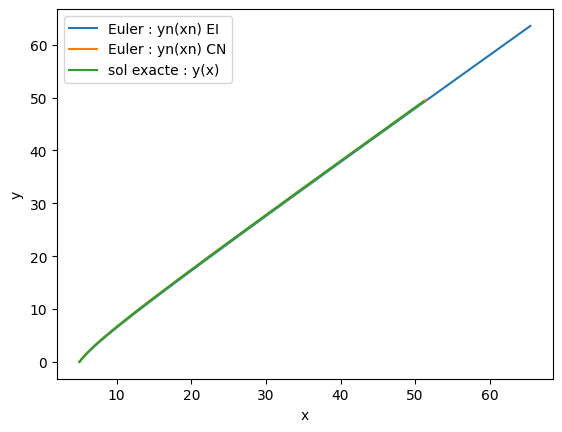

In [7]:
############  Parametres
# conseil : mettre tous les parametres que vous pouvez etre amenes a modifier dans une section au debut du code
T = 1 # temps final
N = 20 # nbre de pas de temps

# condition initiale
X0 = np.array([5.,0.])

##################  affichage des resultats

sol_Euler = Euler_imp(f,df,X0, N, T)
sol_CN = Crank_Nicolson(f,df,X0, N, T)
x_Euler, y_Euler = sol_Euler[:,0] , sol_Euler[:,1]
x_CN, y_CN = sol_CN[:,0] , sol_CN[:,1]
t_Euler = np.linspace(0,1,N+1)

## solution exacte :
sol_exacte = sol(X0,t_Euler)
sol_x , sol_y = sol_exacte[0,:] , sol_exacte[1,:]

## figure x(t) (Euler, CN et sol exacte)
plt.figure()
plt.plot(t_Euler,x_Euler,label="Euler implicite")
plt.plot(t_Euler,x_CN,label="CN")
plt.plot(t_Euler,sol_x,label="x(t)")
plt.xlabel("t")
plt.ylabel("x")
plt.legend()
plt.show()

## figure y(t) (Euler, CN et sol exacte)
plt.figure()
plt.plot(t_Euler,y_Euler,label="Euler implicite")
plt.plot(t_Euler,y_CN,label="CN")
plt.plot(t_Euler,sol_y,label="y(t)")
plt.xlabel("t")
plt.ylabel("y")
plt.legend()
plt.show()

## solution dans le plan des phases (Euler, CN et sol exacte)
plt.figure()
plt.plot(x_Euler,y_Euler,label="Euler : yn(xn) EI")
plt.plot(x_CN,y_CN,label="Euler : yn(xn) CN")
plt.plot(sol_x,sol_y,label="sol exacte : y(x)")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

**Q6)** Retrouver numériquement les taux de convergence des deux schémas.

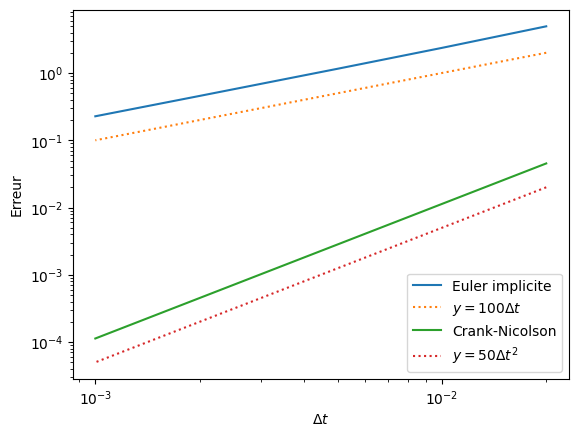

In [16]:
## calcul de l'erreur max commise par le schema d'Euler implicite
def erreur_Euler_imp(X0,N,T):
    sol_Euler = Euler_imp(f,df,X0, N, T)
    x_Euler , y_Euler = sol_Euler[:,0] , sol_Euler[:,1]
    tps = np.linspace(0,T,N+1)
    sol_exacte = np.transpose(sol(X0,tps))
    sol_x , sol_y = sol_exacte[:,0] , sol_exacte[:,1]

    # erreur
    err_x = LA.norm(x_Euler - sol_x, np.inf)
    err_y = LA.norm(y_Euler - sol_y, np.inf)

    return max([err_x, err_y])

## calcul de l'erreur max commise par le schema de Crank-Nicolson
def erreur_CN(X0,N,T):
    sol_CN = Crank_Nicolson(f,df,X0, N, T)
    x_CN , y_CN = sol_CN[:,0] , sol_CN[:,1]
    tps = np.linspace(0,T,N+1)
    sol_exacte = np.transpose(sol(X0,tps))
    sol_x , sol_y = sol_exacte[:,0] , sol_exacte[:,1]

    # erreur
    err_x = LA.norm(x_CN - sol_x, np.inf)
    err_y = LA.norm(y_CN - sol_y, np.inf)

    return max([err_x, err_y])


## erreur en fonction du pas de temps (echelle logarithmique)
pas = [50,100,200,500,1000]

err_Euler = []
err_CN = []
delta_t = []
for k in pas:
    err_Euler.append(erreur_Euler_imp(X0,k,T))
    err_CN.append(erreur_CN(X0,k,T))
    delta_t.append(T/k)

plt.figure()
plt.loglog(delta_t, err_Euler, label="Euler implicite")
plt.loglog(delta_t, [100*dt for dt in delta_t], linestyle='dotted', label='$y=100 \\Delta t$')
plt.loglog(delta_t, err_CN, label="Crank-Nicolson")
plt.loglog(delta_t, [50*dt**2 for dt in delta_t], linestyle='dotted', label='$y=50 \\Delta t^2$')
plt.xlabel('$\\Delta t$')
plt.ylabel("Erreur")
plt.legend()
plt.show()
